#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn==0.9.0
from scipy.stats import ranksums
data = pd.read_csv('tips.csv', sep=',')

##Tradução ou renomear coluna

In [ ]:
data.columns
renomear = {'total_bill':'Total',
            'tip':'Gorjeta',
            'dessert':'Sobremesa',
            'day':'Dia_Semana',
            'time':'Hora_do_Dia',
            'size':'Quantidade_de_Pessoas'}

In [ ]:
gorjetas = data.rename(columns = renomear)

In [ ]:
sim_nao = {'Yes':'Sim',
           'No':'Não'}

In [ ]:
gorjetas.Sobremesa.map(sim_nao)

In [ ]:
gorjetas.Sobremesa = gorjetas.Sobremesa.map(sim_nao)

In [ ]:
dias= {'Sun':'Domingo',
               'Sat':'Sábado',
               'Thur':'Quinta',
               'Fri':'Sexta'}

In [ ]:
gorjetas.Dia_Semana = gorjetas.Dia_Semana.map(dias)

In [ ]:
hora = {'Dinner':'Janta',
            'Lunch':'Almoço'}

In [ ]:
gorjetas.Hora_do_Dia = gorjetas.Hora_do_Dia.map(hora)

In [ ]:
gorjetas.head(10)

##Seaborn e scatter

In [ ]:
ValorGorjetas = sns.scatterplot(x='Total', y='Gorjeta', data=gorjetas)

In [ ]:
print(f'teste vai {gorjetas.shape[0]}')

In [ ]:
porcentagemSea = sns.scatterplot(x='Total',y='Gorjeta',data=gorjetas)

In [ ]:
#corrigindo a relação da gorjeta com o total da conta
porcentagemLinha = sns.relplot(x='Total',y='Porcentagem', kind='line', data=gorjetas)

##Adicionar coluna de porcentagem

In [ ]:
gorjetas['Porcentagem'] = gorjetas['Gorjeta'] / gorjetas['Total']


In [ ]:
gorjetas.Porcentagem = gorjetas.Porcentagem.round(3)

In [ ]:
gorjetas.head(10)

##Tipos de Análises

In [ ]:
#relação de gorjeta com pedir sobremesa

#Não pediu
gorjetas[gorjetas.Sobremesa == 'Não'].describe().round(2)

#Pediu
gorjetas[gorjetas.Sobremesa == 'Sim'].describe().round()

In [ ]:
#Jogando essas relações em um gráfico categórico
sns.catplot(x='Sobremesa',y='Gorjeta',data = gorjetas)

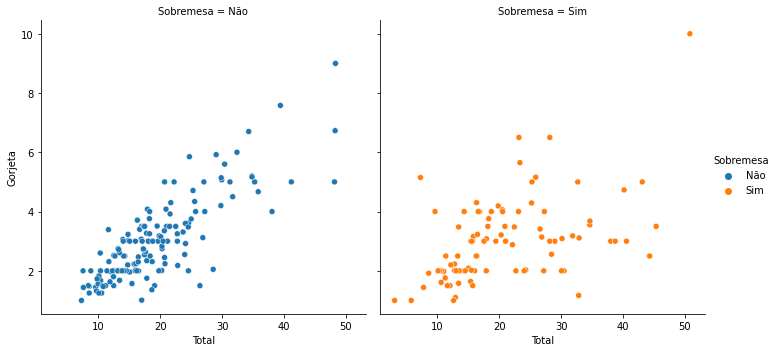

In [ ]:
#Jogando as relaçoes em um gráfico relacional
sns.relplot(x='Total', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=gorjetas)#hue é 'subtitulo' é muda cor do do outro dado analisado
                                                                                    #col divide em 2 gráficos com os parametros passados

In [ ]:
#L M plot traça uma linha de progressão no gráfico
sns.lmplot(x='Gorjeta',y='Porcentagem', col='Sobremesa',hue='Sobremesa', data=gorjetas )
#deixando mais claro a diferença de gorjeta entre quem pediu sobremesa e quem não pediu

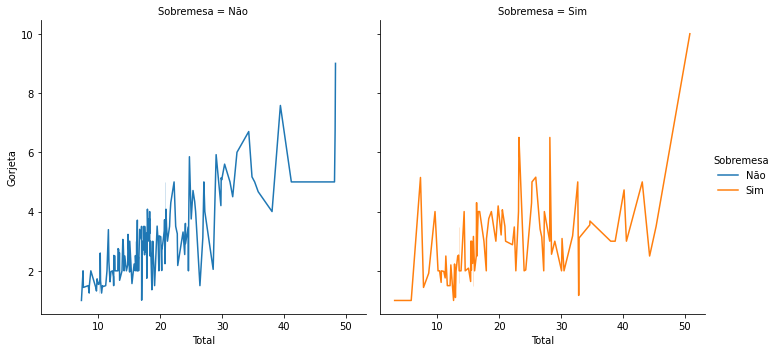

In [ ]:
#transformando a visualização com kind
sns.relplot(x='Total',y='Gorjeta', col='Sobremesa', hue='Sobremesa', kind='line' , data=gorjetas)

In [ ]:
#Filtrar de maneira específica a relação usando ranksums
sobremesaSim = gorjetas.query("Sobremesa == 'Sim'").Porcentagem

In [ ]:
sobremesaNao = gorjetas.query("Sobremesa == 'Não'").Porcentagem

In [ ]:
rankS = ranksums(sobremesaSim, sobremesaNao)